In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
train.shape

(284780, 8)

In [5]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [6]:
test.shape

(122049, 7)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    122049 non-null  int64  
 1   StockCode    122049 non-null  int64  
 2   Description  122049 non-null  int64  
 3   Quantity     122049 non-null  int64  
 4   InvoiceDate  122049 non-null  object 
 5   CustomerID   122049 non-null  float64
 6   Country      122049 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [9]:
print('null values:',test.isnull().sum().sum())
print('null values:',train.isnull().sum().sum())

null values: 0
null values: 0


In [10]:
train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [11]:
train.quantile([.20,0.40,0.60,0.80,0.85,0.90,0.95,0.97])

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0.20,4088.0,829.0,901.0,1.0,0.85,13536.0,35.0
0.40,8292.0,1325.0,1755.0,3.0,1.65,14659.0,35.0
0.60,12234.0,1756.0,2408.0,6.0,2.10,15805.0,35.0
0.80,15498.0,2196.0,3086.0,12.0,4.15,17097.0,35.0
0.85,16320.0,2594.0,3285.0,17.0,4.95,17426.0,35.0
0.90,17161.0,2802.0,3479.0,24.0,6.75,17719.0,35.0
0.95,18042.0,3146.0,3716.0,36.0,8.50,17908.0,35.0
0.97,18375.0,3235.0,3776.0,50.0,9.95,18075.0,35.0


In [12]:
train.duplicated().sum()

2621

In [13]:
train.drop_duplicates(inplace = True)
train.shape

(282159, 8)

In [14]:
train['InvoiceDate'] = pd.to_datetime(train['InvoiceDate'])
train['Year'] = train['InvoiceDate'].dt.year
train['Month'] = train['InvoiceDate'].dt.month
train['Day'] = train['InvoiceDate'].dt.day
train['Hours'] = train['InvoiceDate'].dt.hour
train['Minutes'] = train['InvoiceDate'].dt.minute
train.drop(['InvoiceDate'],axis = 1, inplace = True)

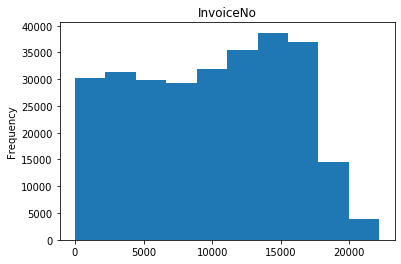

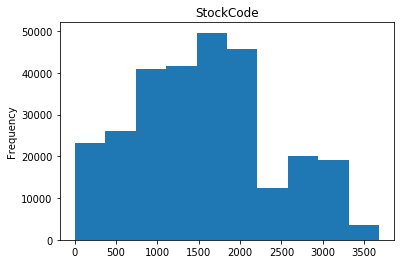

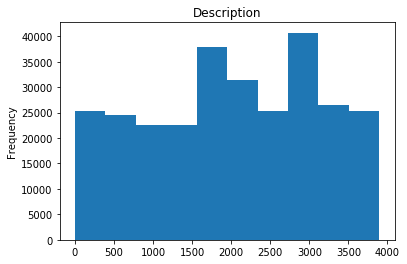

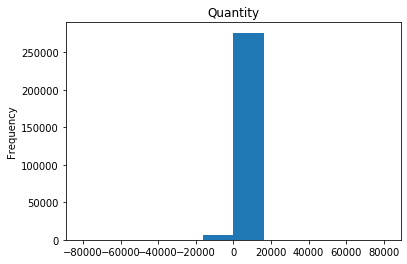

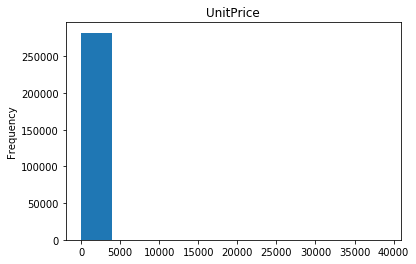

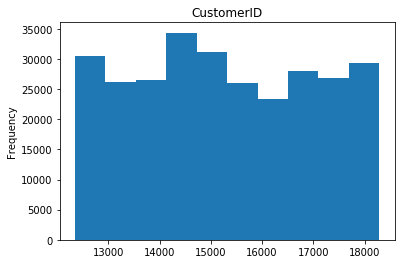

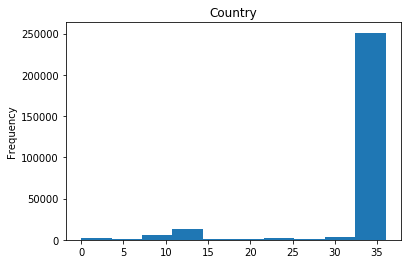

In [15]:
hist = train.loc[:,['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country']]
for var in hist.columns:
    hist[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [16]:
train = train.abs()

In [17]:
train1 = train[(train.Quantity>0) & (train.UnitPrice>0)& (train.InvoiceNo>0)&(train.Quantity<50)&(train.Description>0)]

In [18]:
train1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Hours', 'Minutes'],
      dtype='object')

In [19]:
X = train1.drop(['UnitPrice'], axis =1)
y = train1['UnitPrice']

In [20]:
train1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hours,Minutes
0,6141.0,1583.0,144.0,3.0,3.75,14056.0,35.0,2011.0,5.0,6.0,16.0,54.0
1,6349.0,1300.0,3682.0,6.0,1.95,13098.0,35.0,2011.0,5.0,11.0,7.0,35.0
2,16783.0,2178.0,1939.0,4.0,5.95,15044.0,35.0,2011.0,11.0,20.0,13.0,20.0
3,16971.0,2115.0,2983.0,1.0,0.83,15525.0,35.0,2011.0,11.0,22.0,12.0,7.0
4,6080.0,1210.0,2886.0,12.0,1.65,13952.0,35.0,2011.0,5.0,6.0,9.0,0.0


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [21]:
X = train1.drop(['UnitPrice','Year'], axis =1)
y = train1['UnitPrice']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)

In [23]:
import statsmodels.api as sm 
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
print(build_model(X_train,y_train))

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.40
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           6.68e-26
Time:                        16:46:15   Log-Likelihood:            -1.1367e+06
No. Observations:              191207   AIC:                         2.273e+06
Df Residuals:                  191196   BIC:                         2.273e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6032      2.446      3.108      

In [24]:
X = train1.drop(['UnitPrice','Year','Day','Month'], axis =1)
y = train1['UnitPrice']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)

import statsmodels.api as sm 
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
print(build_model(X_train,y_train))

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     15.48
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.43e-23
Time:                        16:46:16   Log-Likelihood:            -1.1367e+06
No. Observations:              191207   AIC:                         2.273e+06
Df Residuals:                  191198   BIC:                         2.273e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2485      2.409      2.594      

In [28]:
# df = train1.drop(['Year','Day','Month'], axis =1)
# df.to_csv('new_df.csv',index = False)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

rf = RandomForestRegressor(n_estimators=1000, max_depth = 35)

rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)

y_pred_test =  rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_pred_train))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))

print()
print('Accuracy: ',r2_score(y_test,y_pred_test))
print('MSE: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1200, num = 2)]
# Various learning rate parameters
learning_rate = ['0.4','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 35, num = 6)]
# max_depth.append(None)
#Subssample parameter values


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
              }

print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=XGBRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

xg_random.fit(X_train,y_train)

{'n_estimators': [1000, 1200], 'learning_rate': ['0.4', '0.5', '0.6'], 'max_depth': [20, 22, 25, 27, 30]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          reg_l

In [30]:
xg_random.best_params_

{'n_estimators': 1200, 'max_depth': 22, 'learning_rate': '0.6'}

In [43]:
y_pred_train = xg_random.predict(X_train)

y_pred_test =  xg_random.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_pred_train))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))

print()
print('Accuracy: ',r2_score(y_test,y_pred_test))
print('MSE: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Accuracy:  0.9970826008043941
RMSE:  4.9908422182075745

Accuracy:  -0.07188020533048545
MSE:  39.255451219367785


In [32]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=1100, max_depth = 25,learning_rate=0.05,min_child_weight=6,subsample=0.8)

rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)

y_pred_test =  rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_pred_train))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))

print()
print('Accuracy: ',r2_score(y_test,y_pred_test))
print('MSE: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Accuracy:  0.996873243297829
RMSE:  5.166815520293057

Accuracy:  -0.2954908082659027
MSE:  43.15628140298188


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor


#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=XGBRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='r2', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

xg_random.fit(X_train,y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 139.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [27]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}


{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [29]:
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=1100, max_depth = 25,learning_rate=0.05,min_child_weight=6,subsample=0.8)

rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)

y_pred_test =  rf.predict(X_test)

print('Accuracy: ',r2_score(y_train,y_pred_train))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))

print()
print('Accuracy: ',r2_score(y_test,y_pred_test))
print('MSE: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Accuracy:  0.948854717999905
RMSE:  3.7505523714546456

Accuracy:  0.7178455972496255
MSE:  9.263180067764596
